In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [3]:
#Load the Dataset

file_path = r"C:\Users\DELL\Downloads\onlineShoppersDataset"

data = pd.read_csv(file_path + r"\online_shoppers_intention.csv")


In [5]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [9]:
data.shape

(12330, 18)

In [11]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [13]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [15]:
print(data.columns) 

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


In [17]:
print(data.dtypes) 

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


In [19]:
print(f"Duplicate Rows: {data.duplicated().sum()}")

Duplicate Rows: 125


In [21]:
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}


data['Month_Num'] = data['Month'].map(month_mapping)

print(data[['Month', 'Month_Num']].head()) 

  Month  Month_Num
0   Feb          2
1   Feb          2
2   Feb          2
3   Feb          2
4   Feb          2


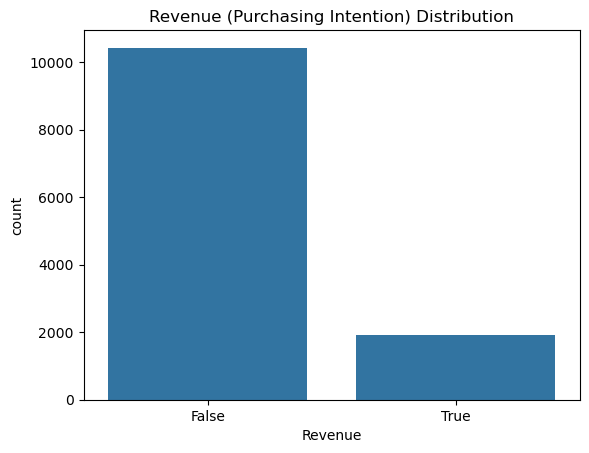

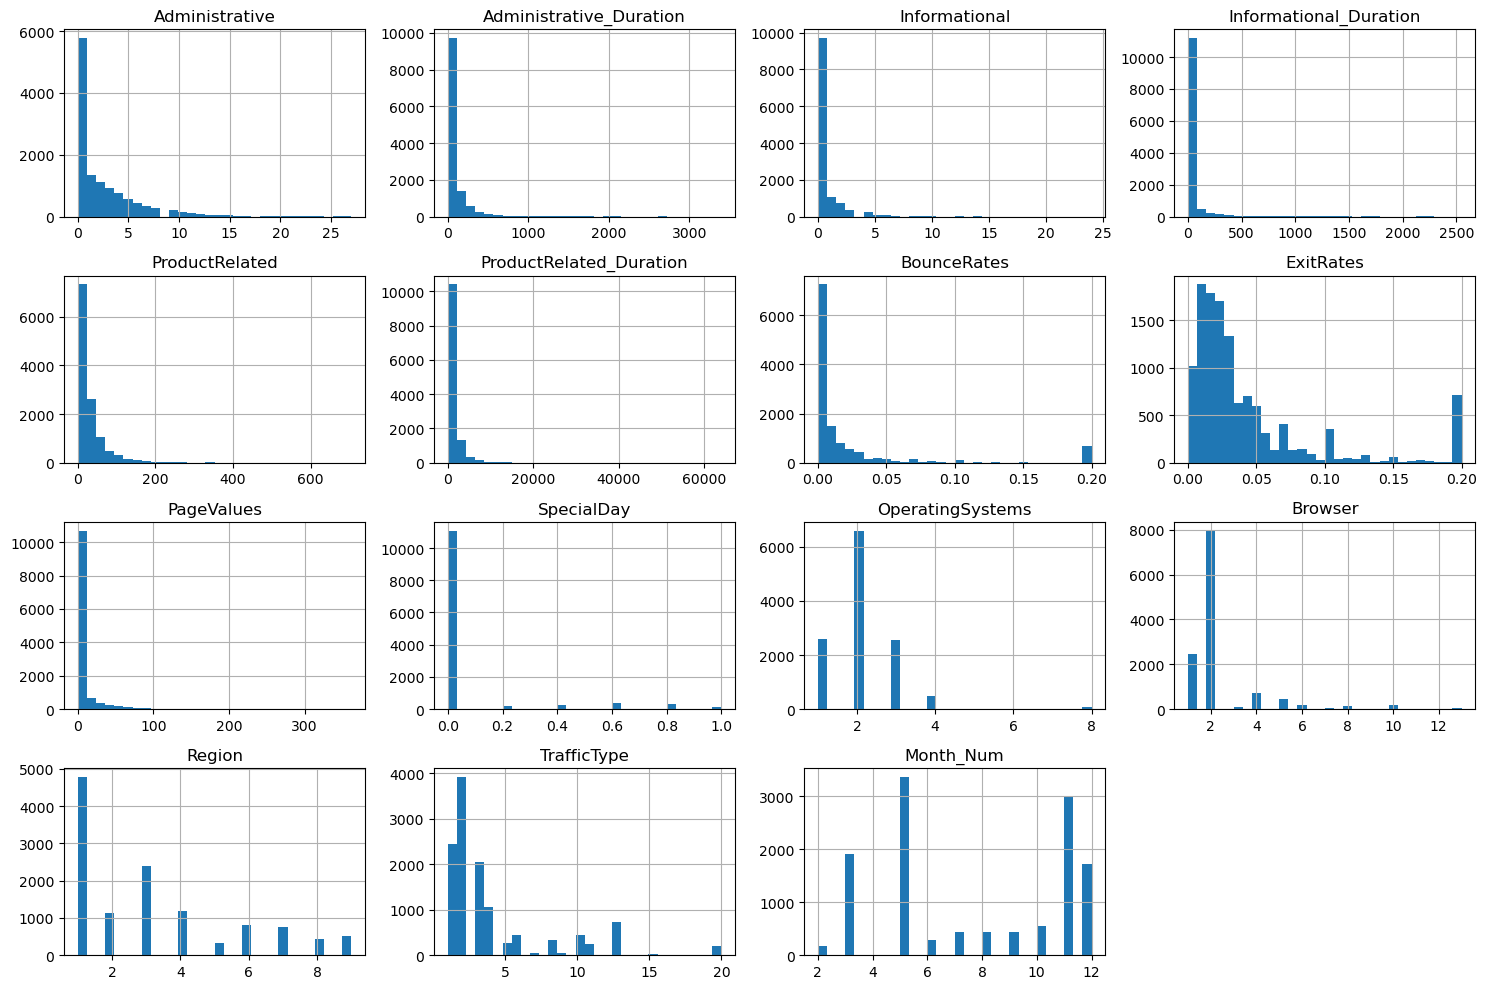

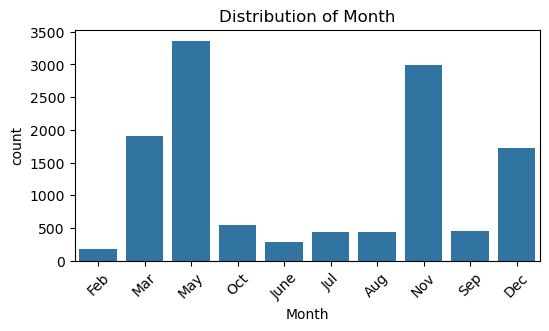

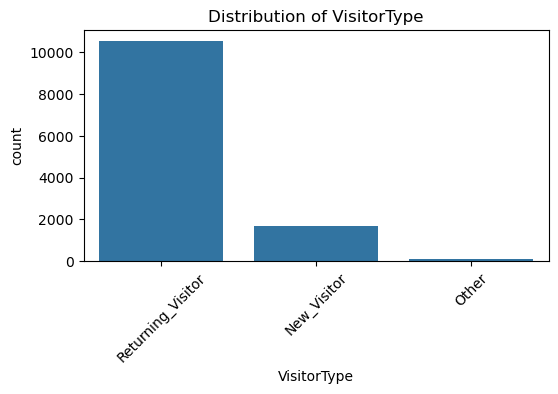

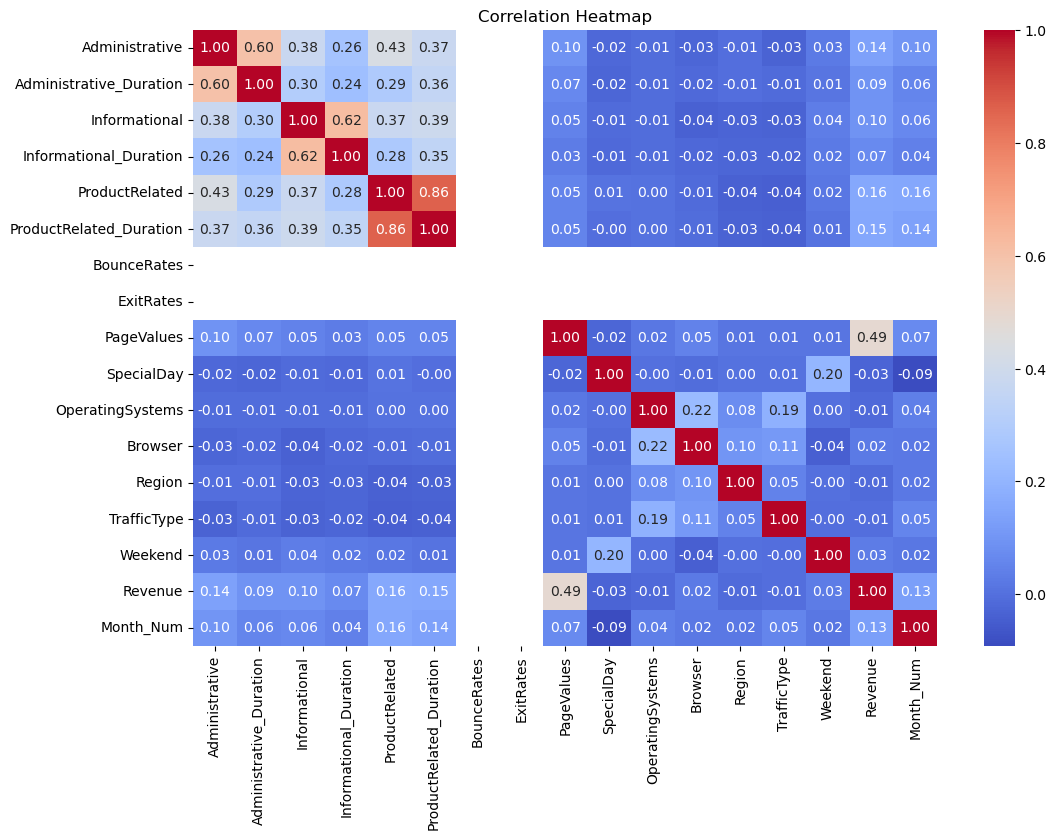

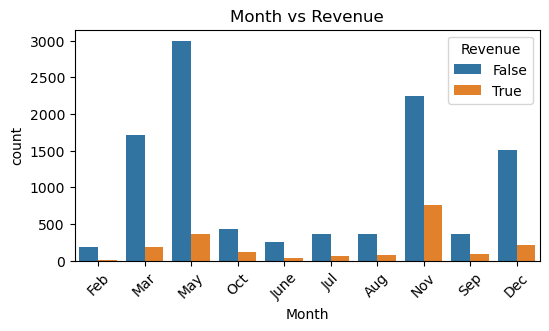

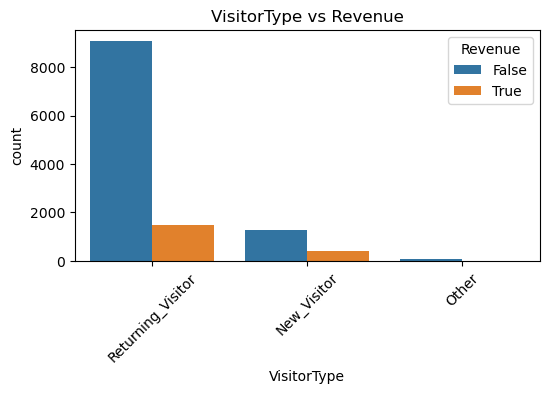

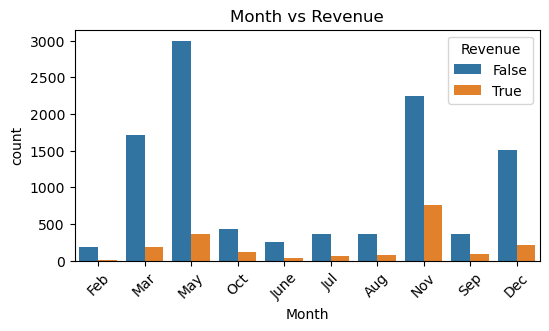

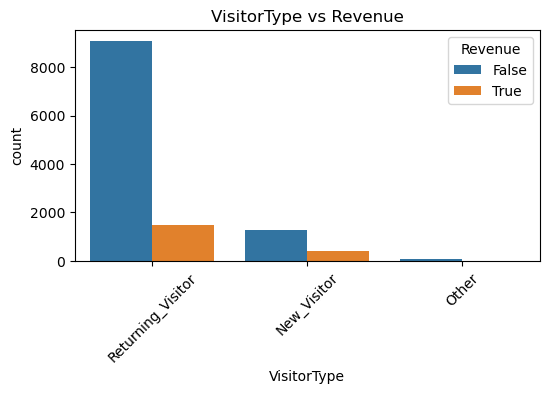

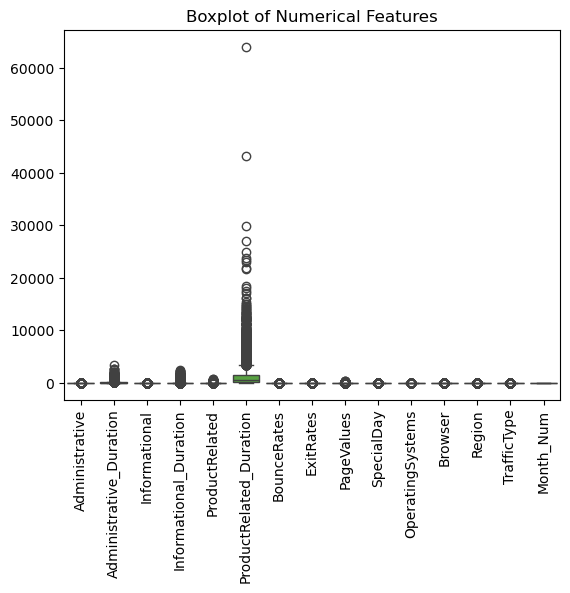

In [37]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Revenue', data=data)
plt.title('Revenue (Purchasing Intention) Distribution')
plt.show()

data['Revenue'].value_counts(normalize=True)

#Univariate Analysis- Numerical Features

numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

data[numerical_features].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

#Univariate Analysis- Categorical Features

categorical_features = data.select_dtypes(include='object').columns

for col in categorical_features:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

#Correlation Heatmap

#Check Non-Numeric Columns:
data.select_dtypes(include='object').columns

# Keep only numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64', 'bool'])

# Optional: convert bool columns to int for correlation to work properly
numeric_data = numeric_data.astype(int)

# Plot correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

#Bivariate Analysis with Target Variable - Numerical vs Revenue

for col in categorical_features:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, hue='Revenue', data=data)
    plt.title(f'{col} vs Revenue')
    plt.xticks(rotation=45)
    plt.show()

#Bivariate Analysis with Target Variable - Categorical vs Revenue

for col in categorical_features:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, hue='Revenue', data=data)
    plt.title(f'{col} vs Revenue')
    plt.xticks(rotation=45)
    plt.show()

#Check for Outliers

sns.boxplot(data=data[numerical_features])
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features")
plt.show()

In [39]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())
#fills the missing values with median of that numerical column

In [41]:
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if data[col].mode().empty:
        data[col].fillna("Unknown", inplace=True)
    else:
       data[col] = data[col].fillna(data[col].mode()[0])
# filling the missing values of categorical columns with most occurent value(mode) or unknown value if the cloumn has no mode

In [43]:
le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])
#converts categorical value into a numerical value

In [45]:
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [47]:
numerical_features = [
    'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues'
]

# Function to detect outliers using IQR
def detect_outliers_iqr(df, features):
    outlier_indices = set()
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index
        outlier_indices.update(outliers)
    return list(outlier_indices)

# Detect outliers
outlier_indices = detect_outliers_iqr(data, numerical_features)

print(f"Number of outlier rows detected: {len(outlier_indices)}")
print("Sample of outlier indices:", outlier_indices[:10])

Number of outlier rows detected: 6220
Sample of outlier indices: [0, 2, 3, 6, 7, 16, 21, 24, 27, 29]


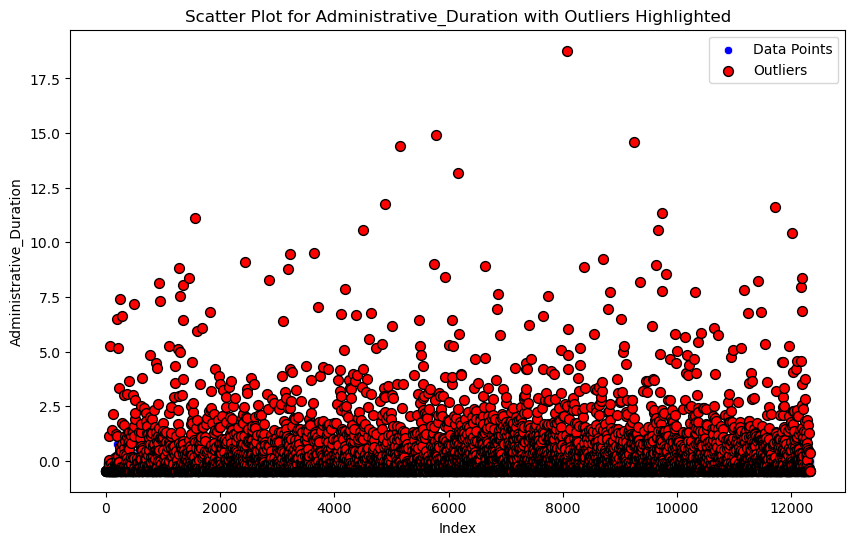

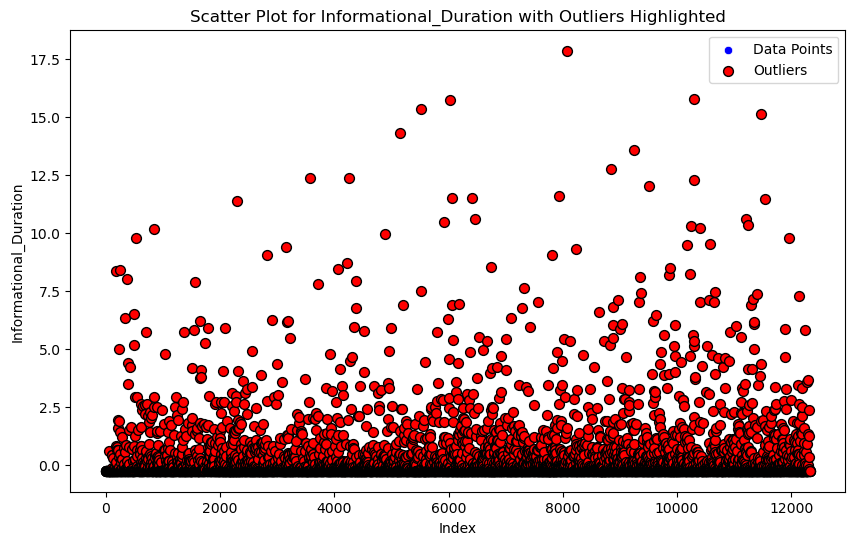

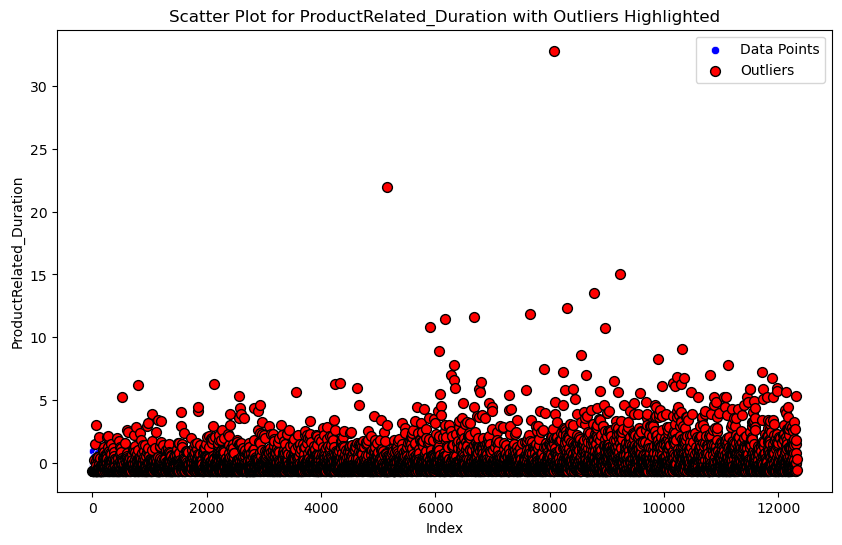

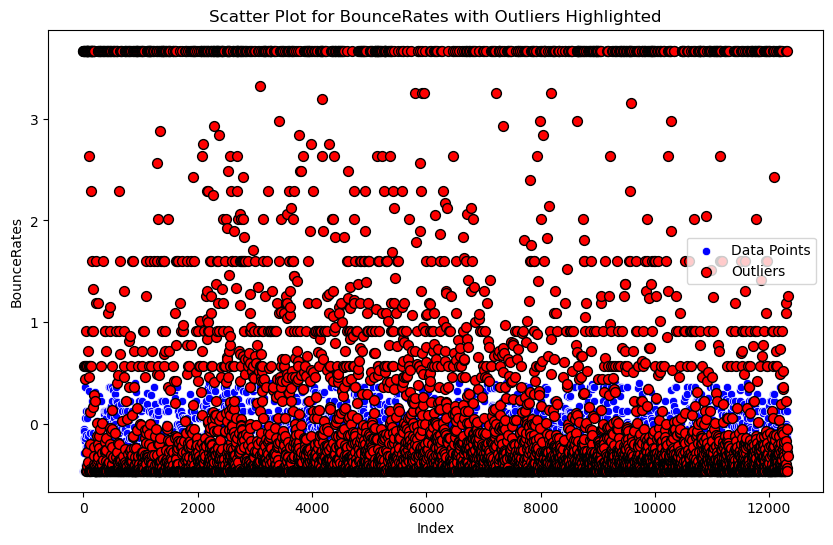

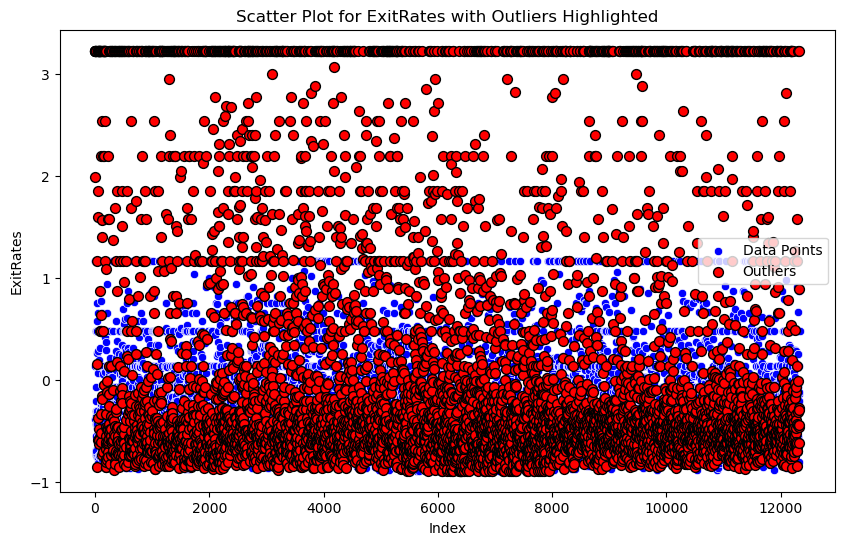

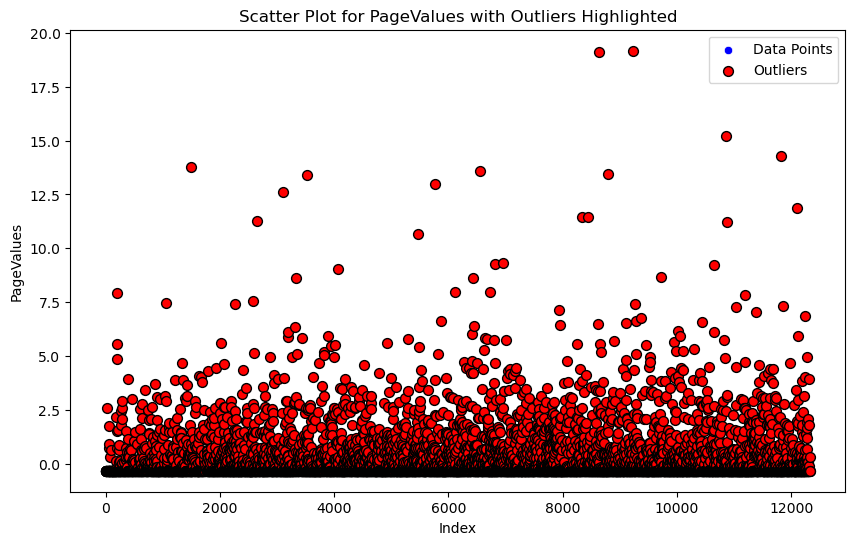

In [49]:
numerical_features = [
    'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues'
]

# Function to detect outliers using IQR
def detect_outliers_iqr(df, features):
    outlier_indices = set()
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index
        outlier_indices.update(outliers)
    return list(outlier_indices)

# Detect outliers
outlier_indices = detect_outliers_iqr(data, numerical_features)

# Plotting the IQR method results using scatterplot
for feature in numerical_features:
    # Prepare data for plotting
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data.index, y=data[feature], label='Data Points', color='blue')

    # Highlight the outliers
    plt.scatter(outlier_indices, data[feature].iloc[outlier_indices], color='red', label='Outliers', s=50, edgecolor='black')

    # Adding labels and title
    plt.title(f'Scatter Plot for {feature} with Outliers Highlighted')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.legend()

    # Display the plot
    plt.show()

In [51]:

numerical_features = [
    'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues'
]

# Function to detect outliers using Z-Score
def detect_outliers_zscore(df, features, threshold=3):
    outlier_indices = []
    for feature in features:
        
        z_scores = (df[feature] - df[feature].mean()) / df[feature].std()
        
        outliers = df[abs(z_scores) > threshold].index
        outlier_indices.extend(outliers)
    
    return list(set(outlier_indices))  

outlier_indices_zscore = detect_outliers_zscore(data, numerical_features)

outlier_rows = data.loc[outlier_indices_zscore]

print(f"\nTotal rows with any outliers: {outlier_rows.shape[0]}")

print(f"Sample of outlier indices: {outlier_indices_zscore[:10]}")


Total rows with any outliers: 1576
Sample of outlier indices: [0, 2, 8195, 6, 7, 16, 21, 24, 8221, 8224]


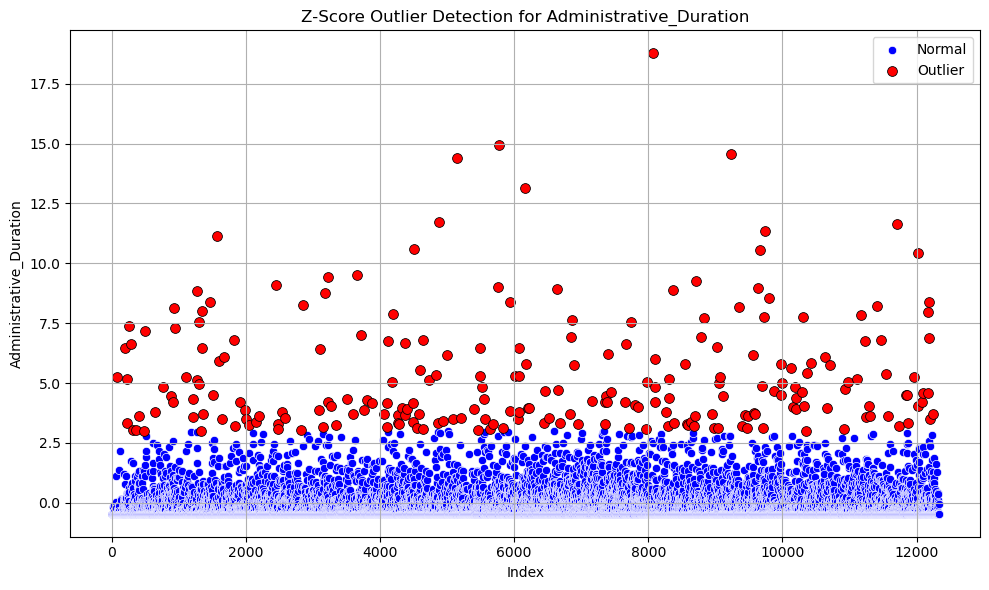

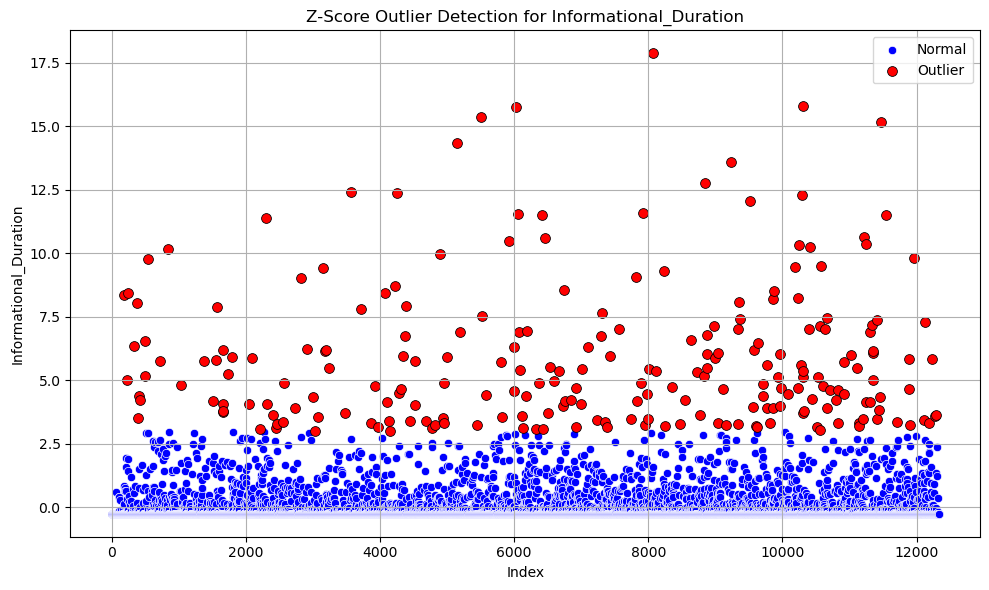

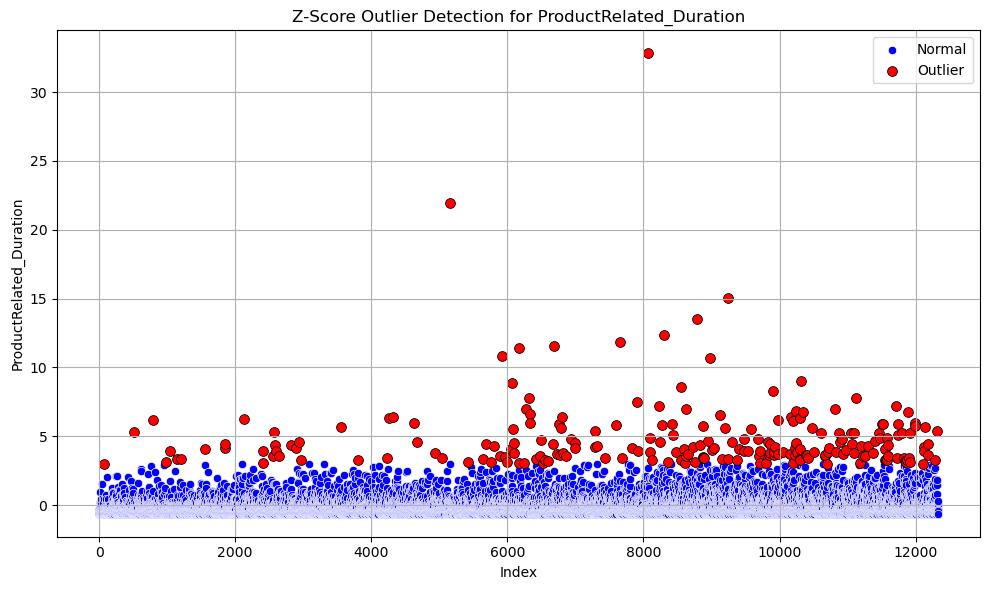

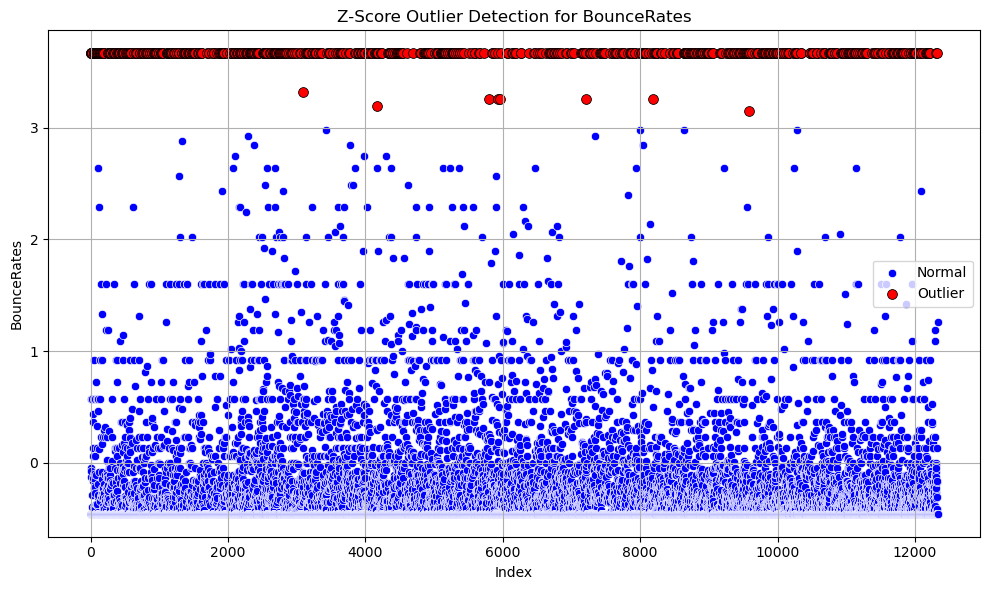

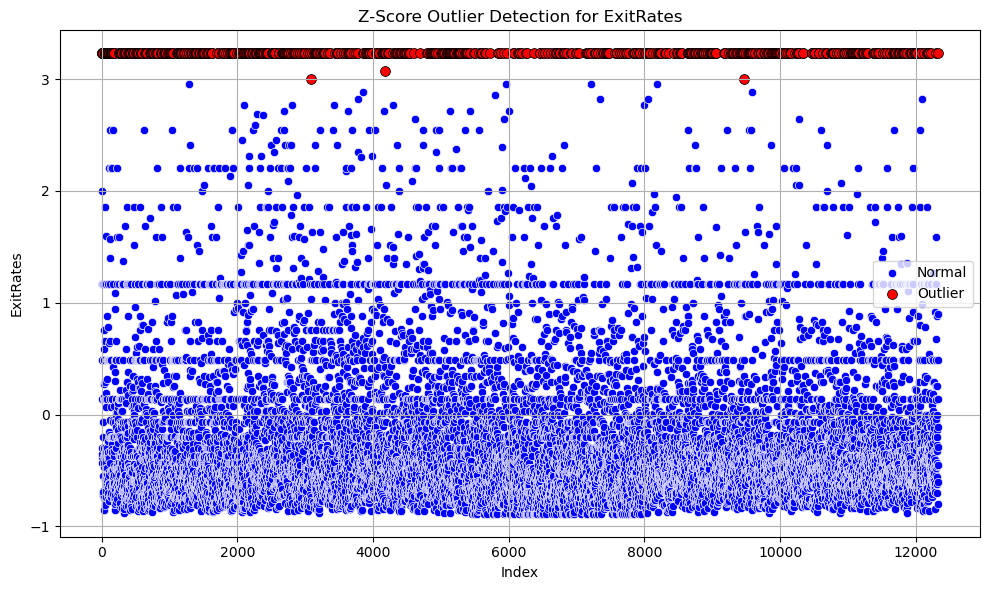

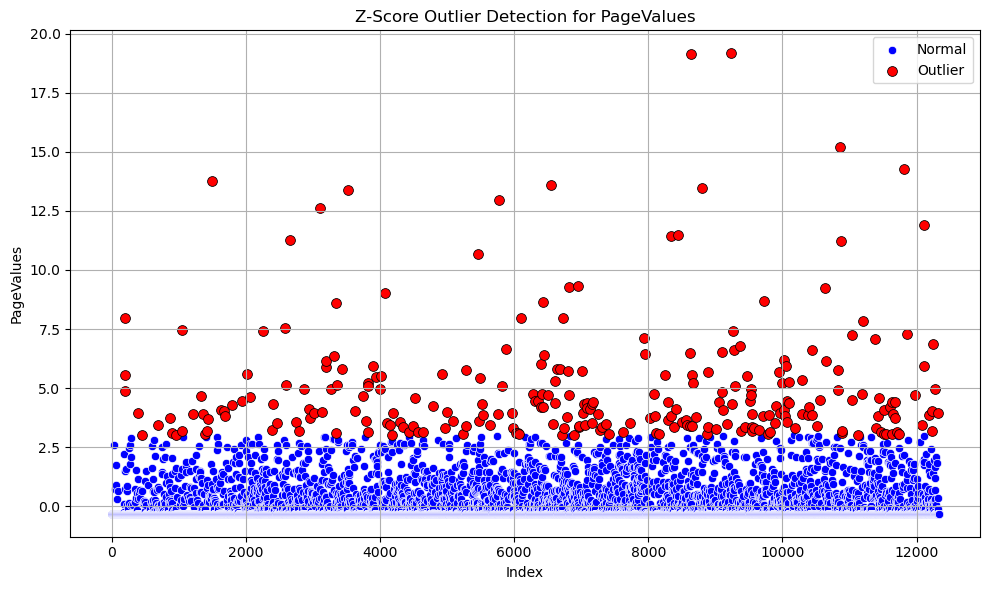

In [53]:

numerical_features = [
    'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues'
]

# Z-score threshold
threshold = 3

for feature in numerical_features:
   
    z_scores = (data[feature] - data[feature].mean()) / data[feature].std()
    
    outlier_mask = abs(z_scores) > threshold

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data.index, y=data[feature], color='blue', label='Normal')
    sns.scatterplot(x=data[outlier_mask].index, y=data[feature][outlier_mask],
                    color='red', label='Outlier', s=50, edgecolor='black')

    plt.title(f'Z-Score Outlier Detection for {feature}')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [55]:
print(data.columns.tolist())

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue', 'Month_Num']


In [57]:
data['Month_Num'] = data['Month_Num'].astype(int) 

In [59]:
data.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int32
OperatingSystems           float64
Browser                    float64
Region                     float64
TrafficType                float64
VisitorType                  int32
Weekend                       bool
Revenue                       bool
Month_Num                    int32
dtype: object

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd

data['target_class'] = pd.cut(data['PageValues'], bins=3, labels=['Low', 'Medium', 'High'])

data_class = data.drop(columns=['PageValues', 'Revenue', 'Month'])  # drop Revenue and string Month
data_class = data_class.dropna()

X = pd.get_dummies(data_class.drop(columns=['target_class']), drop_first=True)
y = LabelEncoder().fit_transform(data_class['target_class'])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier()
}

classification_results = {}

for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    classification_results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.9964
Random Forest Accuracy: 0.9964


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2084
           1       0.75      0.37      0.49       382

    accuracy                           0.88      2466
   macro avg       0.82      0.67      0.71      2466
weighted avg       0.87      0.88      0.87      2466



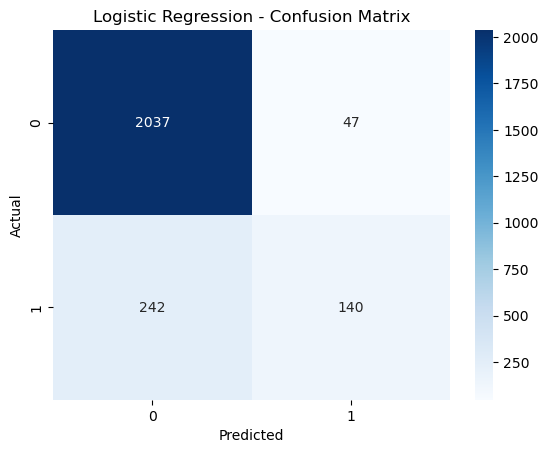


K-Nearest Neighbors Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2084
           1       0.53      0.28      0.37       382

    accuracy                           0.85      2466
   macro avg       0.70      0.62      0.64      2466
weighted avg       0.82      0.85      0.83      2466



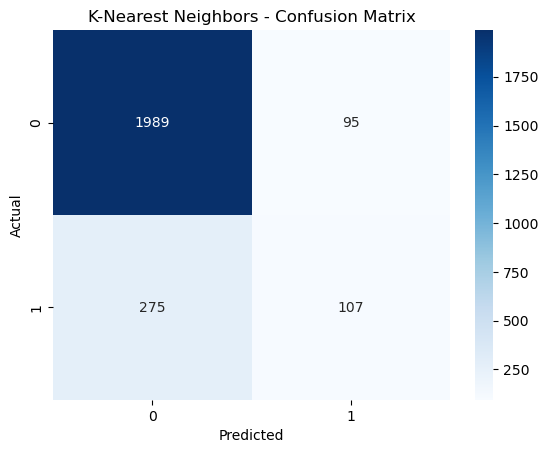


Support Vector Machine Classification Report:

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2084
           1       0.64      0.02      0.04       382

    accuracy                           0.85      2466
   macro avg       0.74      0.51      0.48      2466
weighted avg       0.81      0.85      0.78      2466



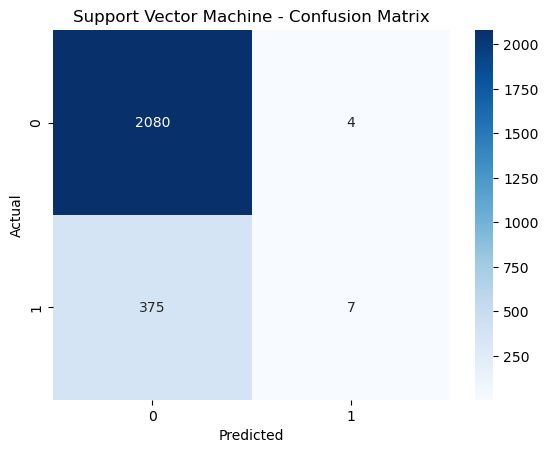


Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2084
           1       0.54      0.55      0.55       382

    accuracy                           0.86      2466
   macro avg       0.73      0.73      0.73      2466
weighted avg       0.86      0.86      0.86      2466



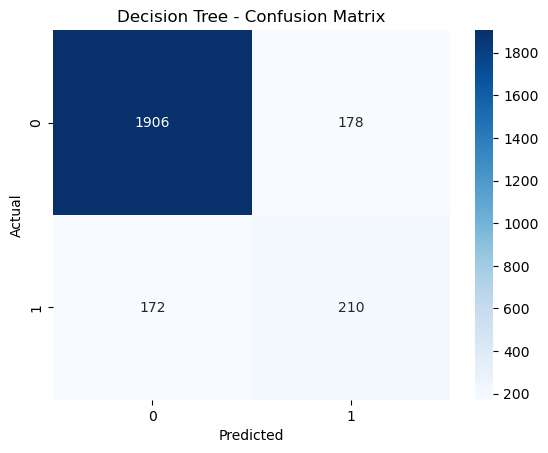


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2084
           1       0.74      0.54      0.62       382

    accuracy                           0.90      2466
   macro avg       0.83      0.75      0.78      2466
weighted avg       0.89      0.90      0.89      2466



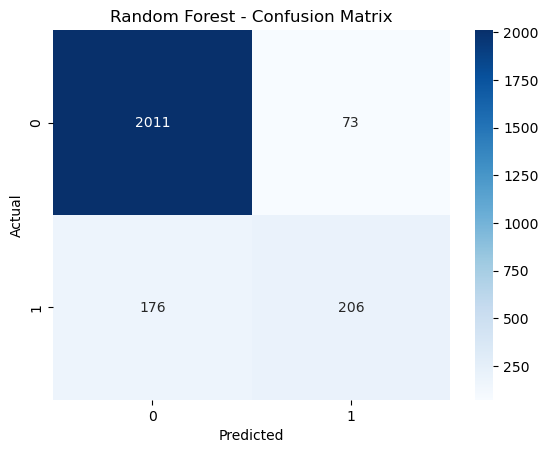


Gradient Boosting Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2084
           1       0.72      0.59      0.65       382

    accuracy                           0.90      2466
   macro avg       0.83      0.77      0.80      2466
weighted avg       0.90      0.90      0.90      2466



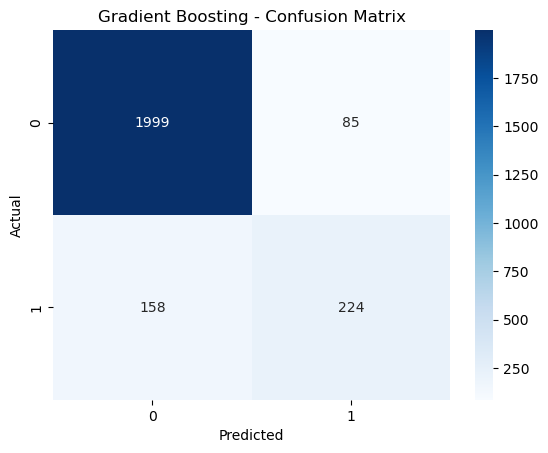


Naive Bayes Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      2084
           1       0.40      0.60      0.48       382

    accuracy                           0.80      2466
   macro avg       0.66      0.71      0.67      2466
weighted avg       0.84      0.80      0.81      2466



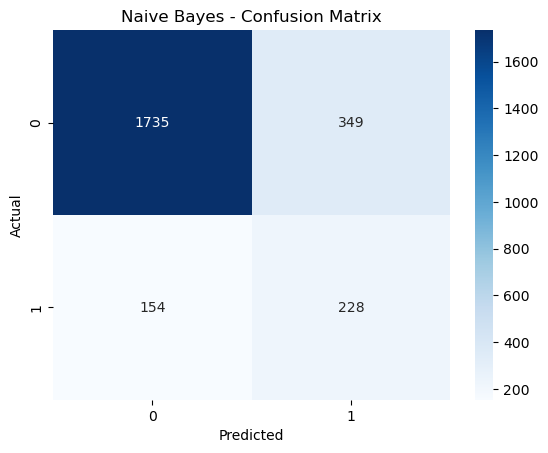

In [106]:
#Train Multiple Classification Models and Evaluate

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })

    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

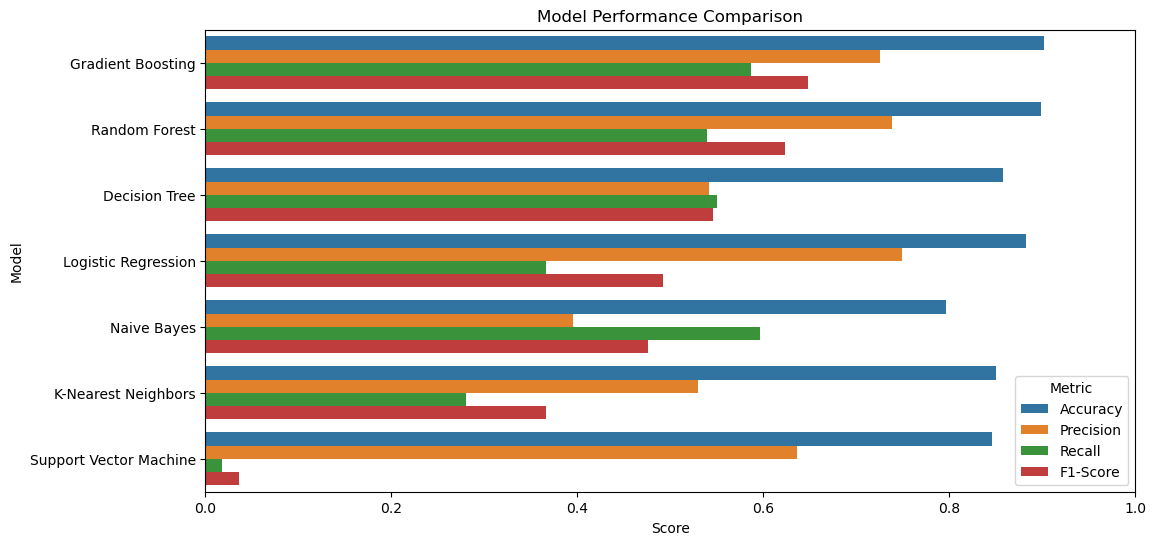

,Model,Accuracy,Precision,Recall,F1-Score
5,Gradient Boosting,0.901460,0.724919,0.586387,0.648336
4,Random Forest,0.899027,0.738351,0.539267,0.623298
3,Decision Tree,0.858070,0.541237,0.549738,0.545455
0,Logistic Regression,0.882806,0.748663,0.366492,0.492091
6,Naive Bayes,0.796026,0.395147,0.596859,0.475495
1,K-Nearest Neighbors,0.849959,0.529703,0.280105,0.366438
2,Support Vector Machine,0.846310,0.636364,0.018325,0.035623


In [108]:
#Visualize Model Comparison

results_df = pd.DataFrame(results).sort_values(by='F1-Score', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=results_df.melt(id_vars='Model'), x='value', y='Model', hue='variable')
plt.title('Model Performance Comparison')
plt.xlabel('Score')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.legend(title='Metric')
plt.show()

results_df
